In [1]:
# imports
from astropy.io import fits
from scipy import interpolate as sin
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotting as myP
import numpy as np
import csv 
import match
import SED

In [2]:
# path variables 
path_cat = 'D:\IfA REU\Catalogs'
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'
path_csv = 'D:\IfA REU\IfA-REU-Project\Lists'

# Get Data

In [3]:
# read AGN IDs
agnIDs = myP.ReadFile(path_csv+'\ID_RedYelBlu_AGNselection.csv')
# split agnIDs into AGN colors 
red_ID = np.array(agnIDs[0], dtype=int)         # IR selected AGN
yel_ID = np.array(agnIDs[1], dtype=int)         # both IR-Xray AGN
blu_ID = np.array(agnIDs[2], dtype=int)         # X-ray selected AGN
byi_ID = np.array(agnIDs[3], dtype=int)         # X-ray selected AGN with IRAC detections
bni_ID = np.array(agnIDs[4], dtype=int)    # X-ray selected AGN without IRAC detections
# print info  
print('Red:\t', len(red_ID))
print('Yel:\t', len(yel_ID))
print('Blu:\t', len(blu_ID))
print('Byi:\t', len(byi_ID))
print('Bni:\t', len(bni_ID))


Cropped:  ['Row 1 = red IR selected AGN. Row 2 = yellow both IR-Xray AGN. Row 3 = blue X-ray selected AGN. Row 4 = blue X-ray selected AGN with IRAC detections. Row 5 = blue X-ray selected AGN without IRAC detections. Values are ID_COSMOS2015.']
Red:	 886
Yel:	 647
Blu:	 1529
Byi:	 1378
Bni:	 151


In [4]:
# read redshifts
zAll = np.array(myP.ReadFile(path_cat+'\COSMOS_z_matches.csv'))
zID, zZ = zAll.T
# get correct data type
zID = np.array(zID, dtype=int)
zZ  = np.array(zZ,  dtype=float)
# apply mask to remove bad redshifts
mask_z = (zZ >= 0) & (zZ < 99)
zID = zID[mask_z]
zZ  = zZ[mask_z]
# print info
print('Number of sources w/ z:', len(zID))

Cropped:  ['ID', 'z']
Number of sources w/ z: 485793


In [5]:
# match redshift against AGN color IDs
key_z_red, key_red_z= match.match(zID, red_ID)
key_z_yel, key_yel_z= match.match(zID, yel_ID)
key_z_blu, key_blu_z= match.match(zID, blu_ID) 
key_z_byi, key_byi_z= match.match(zID, byi_ID) 
key_z_bni, key_bni_z= match.match(zID, bni_ID) 

# get redshift arrays for AGN by color 
red_z = zZ[key_z_red]
yel_z = zZ[key_z_yel]
blu_z = zZ[key_z_blu]
byi_z = zZ[key_z_byi]
bni_z = zZ[key_z_bni]

# get AGN arrays w/ redshifts
red_ID_wZ = red_ID[key_red_z]
yel_ID_wZ = yel_ID[key_yel_z]
blu_ID_wZ = blu_ID[key_blu_z]
byi_ID_wZ = blu_ID[key_byi_z]
bni_ID_wZ = blu_ID[key_bni_z]

# verify 
print('Red:\t', len(red_ID_wZ), '=', len(red_z))
print('Yel:\t', len(yel_ID_wZ), '=', len(yel_z))
print('Blu:\t', len(blu_ID_wZ), '=', len(blu_z))
print('Byi:\t', len(byi_ID_wZ), '=', len(byi_ID))
print('Bni:\t', len(bni_ID_wZ), '=', len(bni_ID))

Red:	 886 = 886
Yel:	 647 = 647
Blu:	 1529 = 1529
Byi:	 1378 = 1378
Bni:	 151 = 151


In [6]:
# open COSMOS 2020 catalog file and get data 
inf20 = fits.open(path_cat+'\COSMOS2020_CLASSIC_R1_v2.0_master.fits')
data20 = inf20[1].data
inf20.close()

In [7]:
Fnu_uJy = SED.GetPhotometry(data20)
IDs_all = SED.GetID(data20)
lam_A   = SED.GetObservedWavelengths_A()

Array shape:	 (1720700, 20)
Array shape:	 (1720700,)
Array shape:	 (20,)


In [8]:
# match AGN color IDS against photometry 
key_IDall_red, key_red_IDall = match.match(IDs_all, red_ID_wZ)
key_IDall_yel, key_yel_IDall = match.match(IDs_all, yel_ID_wZ)
key_IDall_blu, key_blu_IDall = match.match(IDs_all, blu_ID_wZ)
key_IDall_byi, key_byi_IDall = match.match(IDs_all, byi_ID_wZ)
key_IDall_bni, key_bni_IDall = match.match(IDs_all, bni_ID_wZ)

# get photometry for AGN colors 
red_Fnu_uJy = Fnu_uJy[key_IDall_red]
yel_Fnu_uJy = Fnu_uJy[key_IDall_yel]
blu_Fnu_uJy = Fnu_uJy[key_IDall_blu]
byi_Fnu_uJy = Fnu_uJy[key_IDall_byi]
bni_Fnu_uJy = Fnu_uJy[key_IDall_bni]

# get AGN arrays with photometry 
red_ID_wZ_wPhot = red_ID_wZ[key_red_IDall]
yel_ID_wZ_wPhot = yel_ID_wZ[key_yel_IDall]
blu_ID_wZ_wPhot = blu_ID_wZ[key_blu_IDall]
byi_ID_wZ_wPhot = blu_ID_wZ[key_byi_IDall]
bni_ID_wZ_wPhot = blu_ID_wZ[key_bni_IDall]

# verify 
print('Red:\t', len(red_ID_wZ_wPhot), '=', len(red_Fnu_uJy))
print('Yel:\t', len(yel_ID_wZ_wPhot), '=', len(yel_Fnu_uJy))
print('Blu:\t', len(blu_ID_wZ_wPhot), '=', len(blu_Fnu_uJy))
print('Byi:\t', len(byi_ID_wZ_wPhot), '=', len(byi_Fnu_uJy))
print('Bni:\t', len(bni_ID_wZ_wPhot), '=', len(bni_Fnu_uJy))


Red:	 886 = 886
Yel:	 647 = 647
Blu:	 1529 = 1529
Byi:	 1378 = 1378
Bni:	 151 = 151


# SED

In [9]:
# get table of rest wavelengths for AGN colors
red_lamR_A = SED.ConvertToRestWavelength(red_z)
yel_lamR_A = SED.ConvertToRestWavelength(yel_z)
blu_lamR_A = SED.ConvertToRestWavelength(blu_z)
byi_lamR_A = SED.ConvertToRestWavelength(byi_z)
bni_lamR_A = SED.ConvertToRestWavelength(bni_z)

Array shape:	 (886, 20)
Array shape:	 (647, 20)
Array shape:	 (1529, 20)
Array shape:	 (1378, 20)
Array shape:	 (151, 20)


In [10]:
# convert Fnu to lamFlam
red_lamFlam_ergscm2 = SED.ConvertToEnergyDensity(red_lamR_A, red_Fnu_uJy)
yel_lamFlam_ergscm2 = SED.ConvertToEnergyDensity(yel_lamR_A, yel_Fnu_uJy)
blu_lamFlam_ergscm2 = SED.ConvertToEnergyDensity(blu_lamR_A, blu_Fnu_uJy)
byi_lamFlam_ergscm2 = SED.ConvertToEnergyDensity(byi_lamR_A, byi_Fnu_uJy)
bni_lamFlam_ergscm2 = SED.ConvertToEnergyDensity(bni_lamR_A, bni_Fnu_uJy)

Array shape:	 (886, 20)
Array shape:	 (647, 20)
Array shape:	 (1529, 20)
Array shape:	 (1378, 20)
Array shape:	 (151, 20)


In [11]:
# normalize each agn source
red_lamFlam_ergscm2_norm = SED.NormalizeSED_1um(red_lamR_A, red_lamFlam_ergscm2)
yel_lamFlam_ergscm2_norm = SED.NormalizeSED_1um(yel_lamR_A, yel_lamFlam_ergscm2)
blu_lamFlam_ergscm2_norm = SED.NormalizeSED_1um(blu_lamR_A, blu_lamFlam_ergscm2)
byi_lamFlam_ergscm2_norm = SED.NormalizeSED_1um(byi_lamR_A, byi_lamFlam_ergscm2)
bni_lamFlam_ergscm2_norm = SED.NormalizeSED_1um(bni_lamR_A, bni_lamFlam_ergscm2)

Array shape:	 (886, 20)
Array shape:	 (647, 20)
Array shape:	 (1529, 20)
Array shape:	 (1378, 20)
Array shape:	 (151, 20)


In [12]:
# set standard plot format
myP.SetStyle()

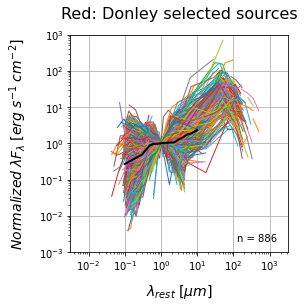

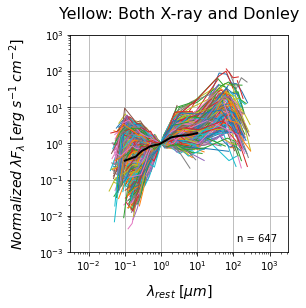

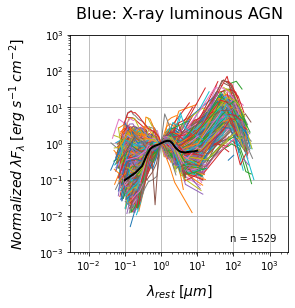

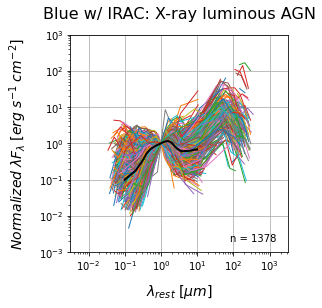

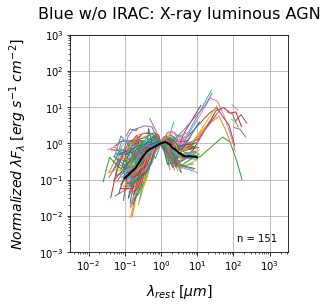

In [28]:
# plot SEDs
SED.PlotSED(red_lamR_A, red_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_red.png', title='Red: Donley selected sources')
SED.PlotSED(yel_lamR_A, yel_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_yel.png', title='Yellow: Both X-ray and Donley')
SED.PlotSED(blu_lamR_A, blu_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_blu.png', title='Blue: X-ray luminous AGN')
SED.PlotSED(byi_lamR_A, byi_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_byi.png', title='Blue w/ IRAC: X-ray luminous AGN')
SED.PlotSED(bni_lamR_A, bni_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_bni.png', title='Blue w/o IRAC: X-ray luminous AGN')

In [14]:
# get array for all sources
all_lamR_A = np.concatenate((red_lamR_A,yel_lamR_A,blu_lamR_A), axis=0)
all_lamFlam_ergscm2_norm = np.concatenate((red_lamFlam_ergscm2_norm,yel_lamFlam_ergscm2_norm,blu_lamFlam_ergscm2_norm), axis=0)

# verify
SED.PrintShape(all_lamR_A)
SED.PrintShape(all_lamFlam_ergscm2_norm)

Array shape:	 (3062, 20)
Array shape:	 (3062, 20)


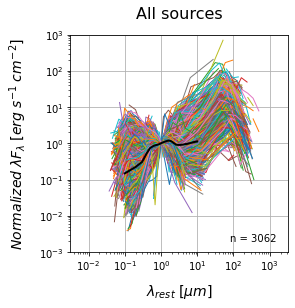

In [15]:
# plot SED for all sources
SED.PlotSED(all_lamR_A, all_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_all.png', title='All sources')

In [16]:
# get array for all sources in Donley wedge (red + yellow)
don_lamR_A = np.concatenate((red_lamR_A,yel_lamR_A), axis=0)
don_lamFlam_ergscm2_norm = np.concatenate((red_lamFlam_ergscm2_norm,yel_lamFlam_ergscm2_norm), axis=0)

# verify
SED.PrintShape(don_lamR_A)
SED.PrintShape(don_lamFlam_ergscm2_norm)

Array shape:	 (1533, 20)
Array shape:	 (1533, 20)


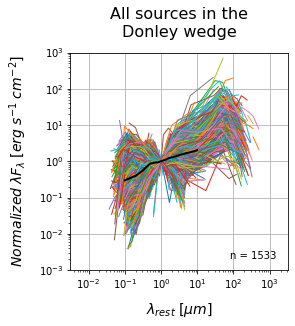

In [17]:
# plot SED for red and yellow sources
SED.PlotSED(don_lamR_A, don_lamFlam_ergscm2_norm, save=path_fig+'\COSMOS_SED_don.png', title='All sources in the\nDonley wedge')

# Bin by Redshift

In [18]:
def BinZ_Mask(z) : 
    bin_z = np.array([
        (z > 0.0) & (z <= 1.0), 
        (z > 1.0) & (z <= 2.0), 
        (z > 2.0)
    ])
    return bin_z

In [19]:
# bin 
red_z_bin_Mask = BinZ_Mask(red_z)
yes_z_bin_Mask = BinZ_Mask(yel_z)
blu_z_bin_Mask = BinZ_Mask(blu_z)
byi_z_bin_Mask = BinZ_Mask(byi_z)
bni_z_bin_Mask = BinZ_Mask(bni_z)

In [20]:
# get rest wavelengths for sources betwee 0<z<1
red_lamR_A_z01 = red_lamR_A[red_z_bin_Mask[0]]
yel_lamR_A_z01 = yel_lamR_A[yes_z_bin_Mask[0]] 
blu_lamR_A_z01 = blu_lamR_A[blu_z_bin_Mask[0]] 
byi_lamR_A_z01 = byi_lamR_A[byi_z_bin_Mask[0]] 
bni_lamR_A_z01 = bni_lamR_A[bni_z_bin_Mask[0]] 

# get energy density for sources betwee 0<z<1
red_lamFlam_ergscm2_norm_z01 = red_lamFlam_ergscm2_norm[red_z_bin_Mask[0]]
yel_lamFlam_ergscm2_norm_z01 = yel_lamFlam_ergscm2_norm[yes_z_bin_Mask[0]]
blu_lamFlam_ergscm2_norm_z01 = blu_lamFlam_ergscm2_norm[blu_z_bin_Mask[0]]
byi_lamFlam_ergscm2_norm_z01 = byi_lamFlam_ergscm2_norm[byi_z_bin_Mask[0]]
bni_lamFlam_ergscm2_norm_z01 = bni_lamFlam_ergscm2_norm[bni_z_bin_Mask[0]]

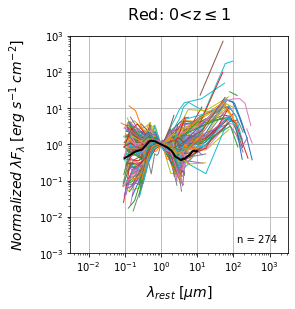

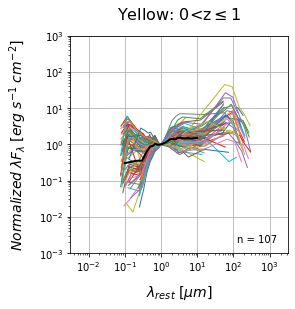

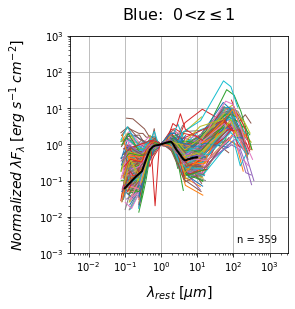

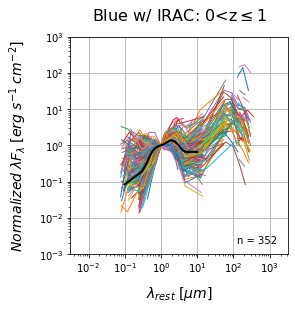

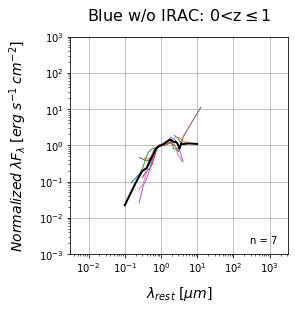

In [27]:
# plot SEDs for 0<z<1
SED.PlotSED(red_lamR_A_z01, red_lamFlam_ergscm2_norm_z01, save=path_fig+'\COSMOS_SED_red_0z1.png', title='Red: 0<z$\leq$1')
SED.PlotSED(yel_lamR_A_z01, yel_lamFlam_ergscm2_norm_z01, save=path_fig+'\COSMOS_SED_yel_0z1.png', title='Yellow: 0<z$\leq$1')
SED.PlotSED(blu_lamR_A_z01, blu_lamFlam_ergscm2_norm_z01, save=path_fig+'\COSMOS_SED_blu_0z1.png', title='Blue:  0<z$\leq$1')
SED.PlotSED(byi_lamR_A_z01, byi_lamFlam_ergscm2_norm_z01, save=path_fig+'\COSMOS_SED_byi_0z1.png', title='Blue w/ IRAC: 0<z$\leq$1')
SED.PlotSED(bni_lamR_A_z01, bni_lamFlam_ergscm2_norm_z01, save=path_fig+'\COSMOS_SED_bni_0z1.png', title='Blue w/o IRAC: 0<z$\leq$1')

In [22]:
# # get rest wavelengths for sources betwee 0<z<1
# red_lamR_A_z12 = red_lamR_A[red_z_bin_Mask[1]]
# yel_lamR_A_z12 = yel_lamR_A[yes_z_bin_Mask[1]] 
# blu_lamR_A_z12 = blu_lamR_A[blu_z_bin_Mask[1]] 
# # get energy density for sources betwee 0<z<1
# red_lamFlam_ergscm2_norm_z12 = red_lamFlam_ergscm2_norm[red_z_bin_Mask[1]]
# yel_lamFlam_ergscm2_norm_z12 = yel_lamFlam_ergscm2_norm[yes_z_bin_Mask[1]]
# blu_lamFlam_ergscm2_norm_z12 = blu_lamFlam_ergscm2_norm[blu_z_bin_Mask[1]]

In [23]:
# # plot SEDs for 0<z<1
# SED.PlotSED(red_lamR_A_z12, red_lamFlam_ergscm2_norm_z12, save=path_fig+'\COSMOS_SED_red_1z2.png', title='Red: 1<z$\leq$2')
# SED.PlotSED(yel_lamR_A_z12, yel_lamFlam_ergscm2_norm_z12, save=path_fig+'\COSMOS_SED_yel_1z2.png', title='Yellow: 1<z$\leq$2')
# SED.PlotSED(blu_lamR_A_z12, blu_lamFlam_ergscm2_norm_z12, save=path_fig+'\COSMOS_SED_blu_1z2.png', title='Blue:  1<z$\leq$2')

In [24]:
# # get rest wavelengths for sources betwee 0<z<1
# red_lamR_A_z2 = red_lamR_A[red_z_bin_Mask[2]]
# yel_lamR_A_z2 = yel_lamR_A[yes_z_bin_Mask[2]] 
# blu_lamR_A_z2 = blu_lamR_A[blu_z_bin_Mask[2]] 
# # get energy density for sources betwee 0<z<1
# red_lamFlam_ergscm2_norm_z2 = red_lamFlam_ergscm2_norm[red_z_bin_Mask[2]]
# yel_lamFlam_ergscm2_norm_z2 = yel_lamFlam_ergscm2_norm[yes_z_bin_Mask[2]]
# blu_lamFlam_ergscm2_norm_z2 = blu_lamFlam_ergscm2_norm[blu_z_bin_Mask[2]]

In [25]:
# # plot SEDs for 0<z<1
# SED.PlotSED(red_lamR_A_z2, red_lamFlam_ergscm2_norm_z2, save=path_fig+'\COSMOS_SED_red_z2.png', title='Red: z>2')
# SED.PlotSED(yel_lamR_A_z2, yel_lamFlam_ergscm2_norm_z2, save=path_fig+'\COSMOS_SED_yel_z2.png', title='Yellow: z>2')
# SED.PlotSED(blu_lamR_A_z2, blu_lamFlam_ergscm2_norm_z2, save=path_fig+'\COSMOS_SED_blu_z2.png', title='Blue:  z>2')

# Investigate 10um

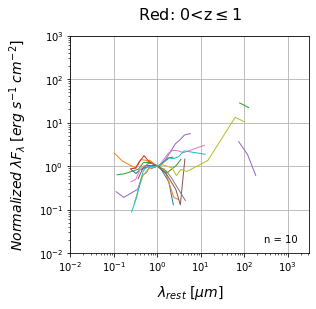

In [26]:
offset = 13
test = np.arange(0,10,1)
test_off = [x+(offset*len(test)) for x in test]

SED.PlotSED(red_lamR_A_z01[test_off], 
            red_lamFlam_ergscm2_norm_z01[test_off], 
            title='Red: 0<z$\leq$1',
            median=False,
            xmin=1E-1,
            ymin=1E-2
            )